<a href="https://colab.research.google.com/github/Surajit-1306/Black-Friday-Dataset-EDA-and-Model/blob/main/Uni_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [198]:
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Lambda


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape, Lambda , LSTM ,Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics.pairwise import cosine_distances

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from matplotlib import pylab
import pandas as pd

import numpy as np
import keras.backend as K
import tensorflow as tf
import operator
from tensorflow import keras
#from keras.utils import np_utils

from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import nltk

In [167]:
# Load your dataset and preprocess it
data = pd.read_csv('annotated.csv')
X=data["text"]
y=data['annotation']
X.shape,y.shape

((21368,), (21368,))

In [168]:
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [169]:
#label_encoder = LabelEncoder()
y = pd.get_dummies(data['annotation'])
y

,business,irrelevant,threat,unknown
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
21363,1,0,0,0
21364,0,0,1,0
21365,0,0,1,0
21366,0,1,0,0


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(17094,) (17094, 4)
(4274,) (4274, 4)


In [171]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
stop_words = set(stopwords.words('english'))
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [173]:
X_train

16286    erpnext cve20183882 sql injection httpstcowyfk...
6198     protonmail names one attackers behind major dd...
8623     costs less smbs prevent ransomware rather payu...
10806    vulnerability found major manufacturers androi...
16989    us problem vulnerable vulnerability greatest t...
                               ...                        
11284    vulnerability found major manufacturers androi...
11964    brenebrown big fan gave speech today berklee c...
5390     collaborative penetration test amp vulnerabili...
860      alleged ‘ satori ’ iot botnet operator sought ...
15795    bungiehelp team got ddosd twice 2 hours kicked...
Name: text, Length: 17094, dtype: object

In [174]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)


In [175]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [176]:
max_sequence_length = 100  # Define your desired sequence length
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test= pad_sequences(X_test, maxlen=max_sequence_length)


In [177]:


# Create an embedding matrix for your vocabulary
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))  # Assuming 300-dimensional embeddings

for word, i in tokenizer.word_index.items():
    if word in wv:
        embedding_matrix[i] = wv[word]


In [178]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33007812,  0.09667969, -0.22265625, ..., -0.06347656,
        -0.20019531,  0.16210938],
       [ 0.375     ,  0.23828125, -0.34960938, ..., -0.07421875,
        -0.02453613,  0.22558594],
       ...,
       [ 0.09423828,  0.08349609,  0.1640625 , ...,  0.17871094,
         0.08154297,  0.1328125 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [179]:
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)

In [180]:
X_train.shape,y_train.shape

((17094, 100), (17094, 4))

In [181]:
y_train[:7]

,business,irrelevant,threat,unknown
16286,0,0,1,0
6198,0,0,1,0
8623,1,0,0,0
10806,0,0,1,0
16989,0,1,0,0
18256,0,0,1,0
9578,1,0,0,0


In [192]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
#model.add(LSTM(200))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(300,)))
for units in [128,128,64,32]:
    model.add(Dense(units,activation='relu'))
    model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
categorical_crossentropy = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 300)          15389700  
                                                                 
 lambda_2 (Lambda)           (None, 300)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               38528     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 64)              

In [193]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
535/535 [==============================] - 6s 7ms/step - loss: 1.1494 - accuracy: 0.5346 - val_loss: 0.9737 - val_accuracy: 0.6008
Epoch 2/5
535/535 [==============================] - 4s 7ms/step - loss: 1.0062 - accuracy: 0.6057 - val_loss: 0.9258 - val_accuracy: 0.6093
Epoch 3/5
535/535 [==============================] - 4s 8ms/step - loss: 0.9795 - accuracy: 0.6137 - val_loss: 0.9196 - val_accuracy: 0.6128
Epoch 4/5
535/535 [==============================] - 4s 7ms/step - loss: 0.9647 - accuracy: 0.6122 - val_loss: 0.9127 - val_accuracy: 0.6086
Epoch 5/5
535/535 [==============================] - 4s 7ms/step - loss: 0.9524 - accuracy: 0.6188 - val_loss: 0.9046 - val_accuracy: 0.6153


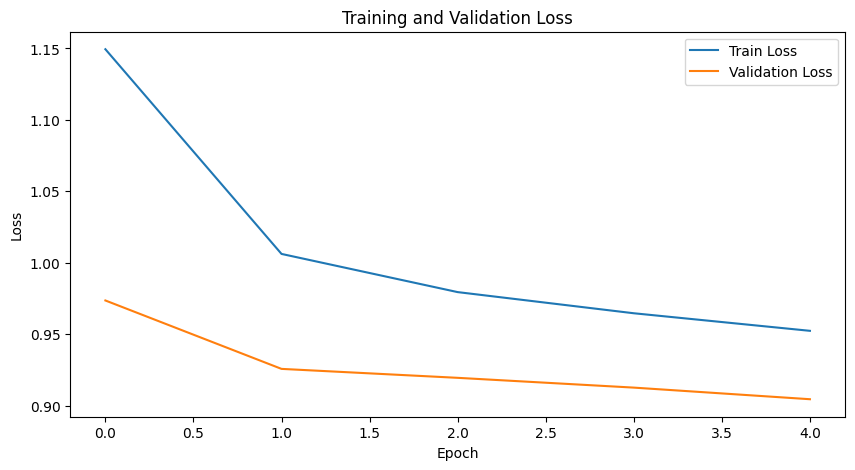

In [199]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()